In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..')) + '/src/'
if module_path not in sys.path:
    sys.path.insert(0, module_path)
import numpy as np
from matplotlib import pyplot as plt

import torch
from pupil import ScalarCartesianPupil, ScalarPolarPupil, VectorialCartesianPupil, VectorialPolarPupil
from propagator import ScalarCartesianPropagator, ScalarPolarPropagator

%load_ext autoreload
%autoreload 2

In [18]:
n_pix_pupil = 1024
n_pix_psf = 201
NA = 0.9
wavelength = 632
fov = 3000
defocus = 0
n_defocus = 1

pupil1 = ScalarCartesianPupil(n_pix_pupil)
pupil2 = ScalarPolarPupil(n_pix_pupil)
# pupil3 = VectorialCartesianPupil(n_pix_pupil)
# pupil4 = VectorialPolarPupil(n_pix_pupil)

tensor(0.1628)
torch.Size([1, 1, 201, 201])


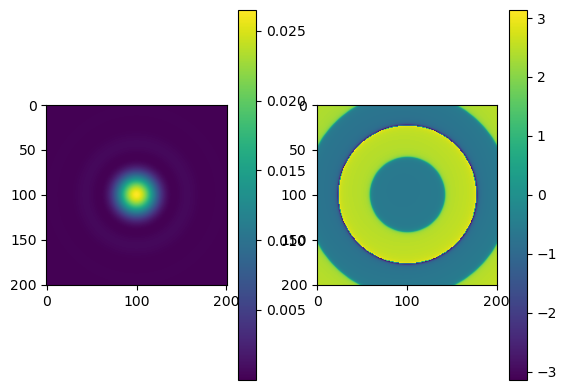

In [19]:
propagator1 = ScalarCartesianPropagator(pupil1, n_pix_psf=n_pix_psf, wavelength=wavelength, NA=NA, fov=fov,
                                        defocus_min=0, defocus_max=defocus, n_defocus=n_defocus,
                                        gibson_lanni=True)
field1 = propagator1.compute_focus_field()
print(torch.max(torch.abs(field1)))

idx = 0
print(field1.shape)
plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(field1[idx,...].squeeze())**2)
plt.colorbar()
plt.subplot(122)
plt.imshow(torch.angle(field1[idx,...].squeeze()))
plt.colorbar()
plt.show()

tensor(0.1631)
torch.Size([1, 1, 201, 201])


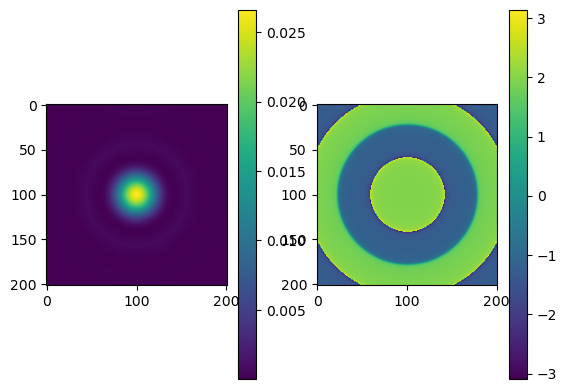

In [20]:
propagator2 = ScalarPolarPropagator(pupil2, n_pix_psf=n_pix_psf, wavelength=wavelength, NA=NA, fov=fov,
                                    defocus_min=0, defocus_max=defocus, n_defocus=n_defocus,
                                    gibson_lanni=True)
field2 = propagator2.compute_focus_field()
print(torch.max(torch.abs(field2)))

idx = 0
print(field2.shape)
plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(field2[idx,...].squeeze())**2)
plt.colorbar()
plt.subplot(122)
plt.imshow(torch.angle(field2[idx,...].squeeze()))
plt.colorbar()
plt.show()

tensor(0.0030)


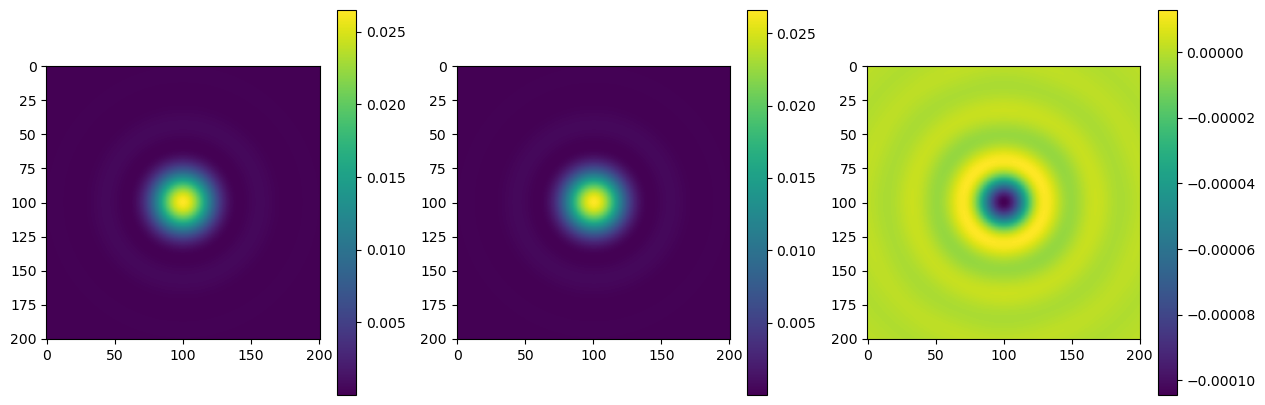

In [21]:
x = torch.abs(field1[idx,...].squeeze())**2
y = torch.abs(field2[idx,...].squeeze())**2

# norm error
print(torch.norm(y - x) / torch.norm(x))

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(x)
plt.colorbar()
plt.subplot(132)
plt.imshow(y)
plt.colorbar()
plt.subplot(133)
plt.imshow(x - y)
plt.colorbar()
plt.show()

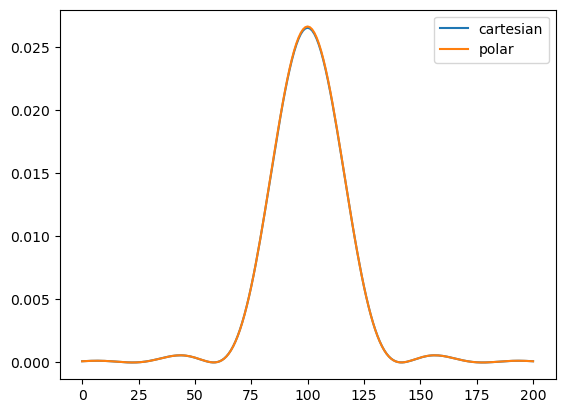

In [22]:
center_idx = 100
x1 = x[center_idx, :]
y1 = y[center_idx, :]

plt.figure()
plt.plot(x1, label="cartesian")
plt.plot(y1, label="polar")
plt.legend()
plt.show()
